In [14]:
import pandas as pd

stress_data = pd.read_csv('StressLevelDataset.csv')

#Testing to see what the first 5 rows of data look like

print(stress_data.head())

   anxiety_level  self_esteem  mental_health_history  depression  headache  \
0             14           20                      0          11         2   
1             15            8                      1          15         5   
2             12           18                      1          14         2   
3             16           12                      1          15         4   
4             16           28                      0           7         2   

   blood_pressure  sleep_quality  breathing_problem  noise_level  \
0               1              2                  4            2   
1               3              1                  4            3   
2               1              2                  2            2   
3               3              1                  3            4   
4               3              5                  1            3   

   living_conditions  ...  basic_needs  academic_performance  study_load  \
0                  3  ...            2        

In [5]:
#The values in the data reflect a scale, which is a form of discrete data.

total_students = len(stress_data)

print(f'The total number of students in the dataset is {total_students}.')

anxiety_level_mean = stress_data['anxiety_level'].mean()
anxiety_level_max = stress_data['anxiety_level'].max()
print(f'The average anxiety level of the students is {anxiety_level_mean.round(2)} with the maximum anxiety level at {anxiety_level_max}.')

mental_health_hist_count = stress_data['mental_health_history'].value_counts()[1]
percent_mental_health_hist = (mental_health_hist_count/total_students)*100
print(f"The number of students with a reported history of mental illness is {mental_health_hist_count}. Out of the {total_students} students surveyed, about {percent_mental_health_hist.round(1)}% of the total have a history of mental illness.")

The total number of students in the dataset is 1100.
The average anxiety level of the students is 11.06 with the maximum anxiety level at 21.
The number of students with a reported history of mental illness is 542. Out of the 1100 students surveyed, about 49.3% of the total have a history of mental illness.


In [20]:
self_esteem_mean = stress_data.self_esteem.mean()
num_self_esteem_below_mean = len(stress_data[stress_data['self_esteem']<self_esteem_mean])

print(f'The number of students that are below the average self-esteem of {self_esteem_mean.round(1)} is {num_self_esteem_below_mean}.')

#Using the PHQ-9 Rating to measure depression, anything greater than 4 is a form of depression

num_depression_above_zero = len(stress_data[stress_data['depression']>4])
percent_depression = (num_depression_above_zero/total_students)*100
print(f'{percent_depression}% of the students surveyed reported experiencing some level of depression. See the table below for more information.')

The number of students that are below the average self-esteem of 17.8 is 507.
82.0% of the students surveyed reported experiencing some level of depression. See the table below for more information.


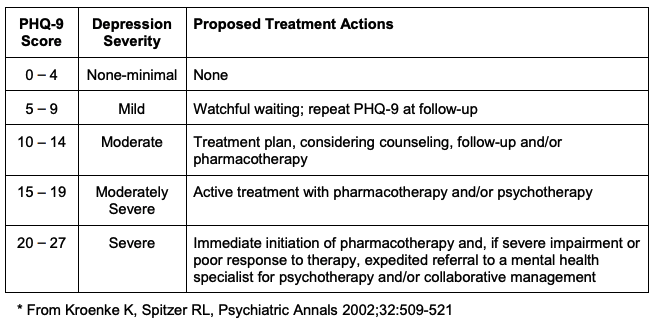

In [21]:
from IPython import display
display.Image("phq-9.png")

In [23]:
#On a scale from 0 to 5, with anything over 3 as "frequent headaches"
num_headache_frequent = len(stress_data[stress_data['headache']>3])

print(f'{num_headache_frequent} students experience headaches frequently.')

#On a scale from 1 to 3
blood_pressure_mean = stress_data.blood_pressure.mean().round(2)

print(f'The average blood pressure rating is {blood_pressure_mean}.')

#Less than 3 is poor sleep quality
num_poor_sleep_quality = len(stress_data[stress_data.sleep_quality<3])
percent_poor_sleep_quality = (num_poor_sleep_quality/total_students)*100
print(f'The number of students with poor quality of sleep is {num_poor_sleep_quality}, which is {percent_poor_sleep_quality}% of all the students surveyed.')

269 students experience headaches frequently.
The average blood pressure rating is 2.18.
The number of students with poor quality of sleep is 550, which is 50.0% of all the students surveyed.


In [32]:
#More than 3 is high noise level
num_high_noise_level = len(stress_data[stress_data.noise_level>3])
print(f'{num_high_noise_level} students live in conditions with high noise level.')

#Percentage of students that feel unsafe in their living conditions, if unsafe is less than 3
num_unsafe = len(stress_data[stress_data.safety<3])
percent_unsafe = round((num_unsafe/total_students)*100,1)
print(f'{percent_unsafe}% of students feel unsafe in their living conditions.')

#Needs are not being met when it equals zero
num_no_basic_needs = len(stress_data[stress_data.basic_needs == 0])
print(f'{num_no_basic_needs} students do not have their basic needs met.')

274 students live in conditions with high noise level.
51.4% of students feel unsafe in their living conditions.
40 students do not have their basic needs met.


In [34]:
#Below average means less than 3
num_below_avg_acad_perf = len(stress_data[stress_data.academic_performance<3])
percent_below_avg_acad_perf = round((num_below_avg_acad_perf/total_students)*100,1)
print(f'{num_below_avg_acad_perf} students rate their academic performance as below average, about {percent_below_avg_acad_perf}% of the total.')

#Scale from 0 to 5, low to high
avg_study_load = stress_data.study_load.mean().round(2)
print(f'The average study load reported by students is {avg_study_load}.')

#Scale from 0 to 5, with 5 being most concerned and 0 being no concern
high_future_career_concerns = len(stress_data[stress_data.future_career_concerns>3])
percent_high_future_career_concerns = round((high_future_career_concerns/total_students)*100,1)
print(f'{high_future_career_concerns} students are concerned about their future careers, which accounts to {percent_high_future_career_concerns}% of the students surveyed.')

561 students rate their academic performance as below average, about 51.0% of the total.
The average study load reported by students is 2.62.
371 students are concerned about their future careers, which accounts to 33.7% of the students surveyed.


In [12]:
#Social support is ranged from 0 to 3, with 3 having "strong" social support
num_strong_social_support = len(stress_data[stress_data.social_support == 3])
print(f'{num_strong_social_support} students feel that they have strong social support.')

#Range of bullying from 0 to 5
num_bullying = len(stress_data[stress_data.bullying>0])
percent_bullying = round((num_bullying/total_students)*100,1)
print(f'{percent_bullying}% of all the students in the survey have experienced some form of bullying.')

#extracurricular activites is ranged from 0 to 5
num_extracurricular_activities = len(stress_data[stress_data.extracurricular_activities>0])
print(f'{num_extracurricular_activities} students participate in extracurricular activites.')

458 students feel that they have strong social support.
96.5% of all the students in the survey have experienced some form of bullying.
1066 students participate in extracurricular activites.


In [27]:
#Correlation between anxiety level and academic performance
corr_anxiety_academic = stress_data.anxiety_level.corr(stress_data.academic_performance).round(2)
print(f'The correlation between Anxiety Level and Academic Performance is {corr_anxiety_academic}. This negative correlation means that as a student\'s Anxiety Level increases, their the Academic Performance decreases.')

#Correlation between sleep quality and depression levels
corr_sleep_depression = stress_data.sleep_quality.corr(stress_data.depression).round(2)
print(f'The correlation between Sleep and Depression Levels is {corr_sleep_depression}. This negative correlation means that as a student\'s Sleep quality is increased, their Depression Level drops.')

#Correlation between bullying and mental health history
corr_bullying_history = stress_data.bullying.corr(stress_data.mental_health_history).round(2)
print(f'The correlation between being bullied and having a history of mental health is {corr_bullying_history}. This positive correlation means that if a student is being bullied, they have a higher chance of having a history of mental health issues.')

The correlation between Anxiety Level and Academic Performance is -0.65. This negative correlation means that as a student's Anxiety Level increases, their the Academic Performance decreases.
The correlation between Sleep and Depression Levels is -0.69. This negative correlation means that as a student's Sleep quality is increased, their Depression Level drops.
The correlation between being bullied and having a history of mental health is 0.62. This positive correlation means that if a student is being bullied, they have a higher chance of having a history of mental health issues.
